<a href="https://colab.research.google.com/github/Shivay-Shakti/financial_analytics/blob/main/currency_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = {
    1913: 0.09, 1925: 0.1, 1947: 4.16, 1948: 3.31, 1949: 3.67, 1950: 4.76, 1951: 4.76,
    1952: 4.76, 1953: 4.76, 1954: 4.76, 1955: 4.76, 1956: 4.76, 1957: 4.76, 1958: 4.76,
    1959: 4.76, 1960: 4.76, 1961: 4.76, 1962: 4.76, 1963: 4.76, 1964: 4.76, 1965: 4.76,
    1966: 6.36, 1967: 7.5, 1968: 7.5, 1969: 7.5, 1970: 7.5, 1971: 7.49, 1972: 7.59,
    1973: 7.74, 1974: 8.1, 1975: 8.38, 1976: 8.96, 1977: 8.74, 1978: 8.19, 1979: 8.13,
    1980: 7.86, 1981: 8.66, 1982: 9.46, 1983: 10.1, 1984: 11.36, 1985: 12.37, 1986: 12.61,
    1987: 12.96, 1988: 13.92, 1989: 16.23, 1990: 17.5, 1991: 22.74, 1992: 25.92, 1993: 30.49,
    1994: 31.37, 1995: 32.43, 1996: 35.43, 1997: 36.31, 1998: 41.26, 1999: 43.06, 2000: 44.94,
    2001: 47.19, 2002: 48.61, 2003: 46.58, 2004: 45.32, 2005: 44.1, 2006: 45.31, 2007: 41.35,
    2008: 43.51, 2009: 48.41, 2010: 45.73, 2011: 46.67, 2012: 53.44, 2013: 56.57, 2014: 62.33,
    2015: 62.97, 2016: 66.46, 2017: 67.79, 2018: 70.09, 2019: 70.39, 2020: 76.38, 2021: 74.57,
    2022: 81.35, 2023: 81.94
}

# Convert data into pandas DataFrame
df = pd.DataFrame(list(data.items()), columns=['Year', 'Exchange Rate'])

df

,Year,Exchange Rate
0,1913,0.09
1,1925,0.10
2,1947,4.16
3,1948,3.31
4,1949,3.67
...,...,...
74,2019,70.39
75,2020,76.38
76,2021,74.57
77,2022,81.35


In [57]:
# Data Source World Bank - https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=IN

economy = {
    "year": [1913, 1929, 1938, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2021, 2022],
    "real_gdp": [120.5, 141.3, 135.8, 154.9, 186.9, 252.7, 382.1, 622.2, 1140, 2270, 3320, 3540, 3760],
    "nominal_gdp": [12.7, 16.2, 15.5, 21.2, 30.6, 50.3, 102.4, 286.7, 532.3, 1500, 2600, 2800, 3000],
    "per_capita_income": [100, 120, 115, 116, 133, 167, 225, 323, 457, 1054, 1533, 1624, 1715],
}

econ = pd.DataFrame(economy)

econ

,year,real_gdp,nominal_gdp,per_capita_income
0,1913,120.5,12.7,100
1,1929,141.3,16.2,120
2,1938,135.8,15.5,115
3,1950,154.9,21.2,116
4,1960,186.9,30.6,133
5,1970,252.7,50.3,167
6,1980,382.1,102.4,225
7,1990,622.2,286.7,323
8,2000,1140.0,532.3,457
9,2010,2270.0,1500.0,1054


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           79 non-null     int64  
 1   Exchange Rate  79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [59]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

df.set_index('Year',inplace=True)

df

,Exchange Rate
Year,
1913,0.09
1925,0.10
1947,4.16
1948,3.31
1949,3.67
...,...
2019,70.39
2020,76.38
2021,74.57


In [60]:
df['Diff'] = df['Exchange Rate'].diff()

df

,Exchange Rate,Diff
Year,,
1913,0.09,NaN
1925,0.10,0.01
1947,4.16,4.06
1948,3.31,-0.85
1949,3.67,0.36
...,...,...
2019,70.39,0.30
2020,76.38,5.99
2021,74.57,-1.81


In [61]:
df['delta_rank'] = df['Diff'].rank(ascending=False,method='min') # +1 so that ranking starts from 1 and method = min so that same quantity same rank
df

,Exchange Rate,Diff,delta_rank
Year,,,
1913,0.09,NaN,NaN
1925,0.10,0.01,48.0
1947,4.16,4.06,9.0
1948,3.31,-0.85,72.0
1949,3.67,0.36,40.0
...,...,...,...
2019,70.39,0.30,43.0
2020,76.38,5.99,3.0
2021,74.57,-1.81,75.0


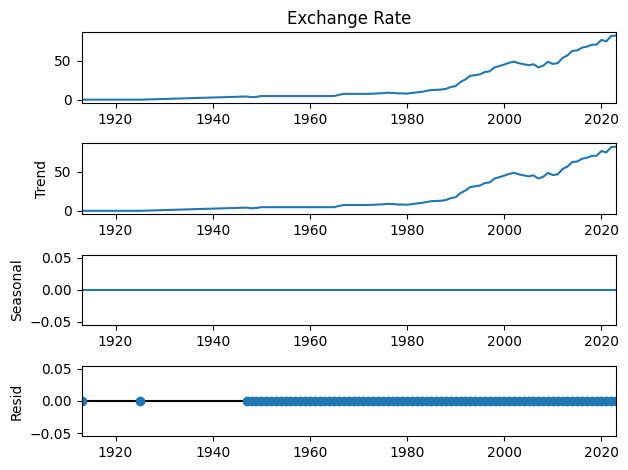

In [62]:
# Time Series Decompostion

# df_1991 = df[df['Year'].dt.year > 1990] # FAILED TO CHANGE TRY AGAIN
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Exchange Rate'], period=1)
decomposition.plot();


In [67]:
df_sorted = df.sort_values(by='delta_rank')

df_sorted.head(12)

,Exchange Rate,Diff,delta_rank
Year,,,
2022,81.35,6.78,1.0
2012,53.44,6.77,2.0
2020,76.38,5.99,3.0
2014,62.33,5.76,4.0
1991,22.74,5.24,5.0
1998,41.26,4.95,6.0
2009,48.41,4.90,7.0
1993,30.49,4.57,8.0
1947,4.16,4.06,9.0


In [70]:
df.plot(df['Diff'])

ValueError: ignored

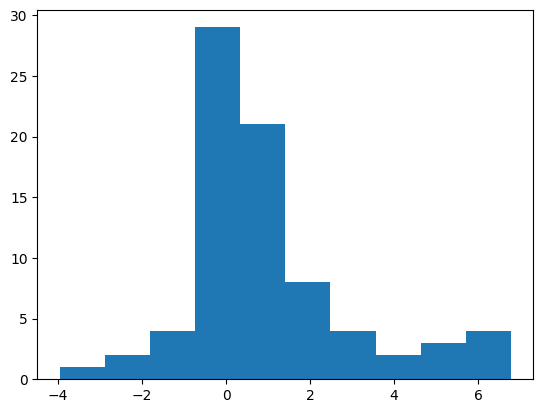

In [72]:
plt.hist(df['Diff']);

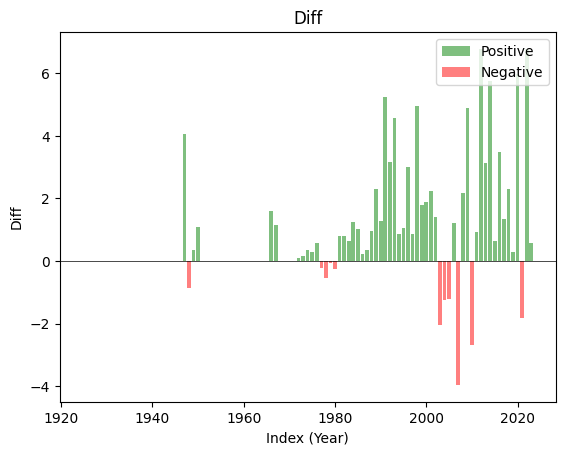

In [75]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Diff' as the column

# Create a positive and negative series
positive_diff = df[df["Diff"] > 0]
negative_diff = df[df["Diff"] < 0]

# Plot the positive and negative series
plt.bar(positive_diff.index, positive_diff["Diff"], color="green", alpha=0.5, label="Positive")
plt.bar(negative_diff.index, negative_diff["Diff"], color="red", alpha=0.5, label="Negative")

# Add a horizontal line at y=0 to represent the x-axis
plt.axhline(0, color='black', linewidth=0.5)

# Add a title and labels
plt.title("Diff")
plt.xlabel("Index (Year)")
plt.ylabel("Diff")

# Add the legend
plt.legend(loc="upper right")

# Show the plot
plt.show()


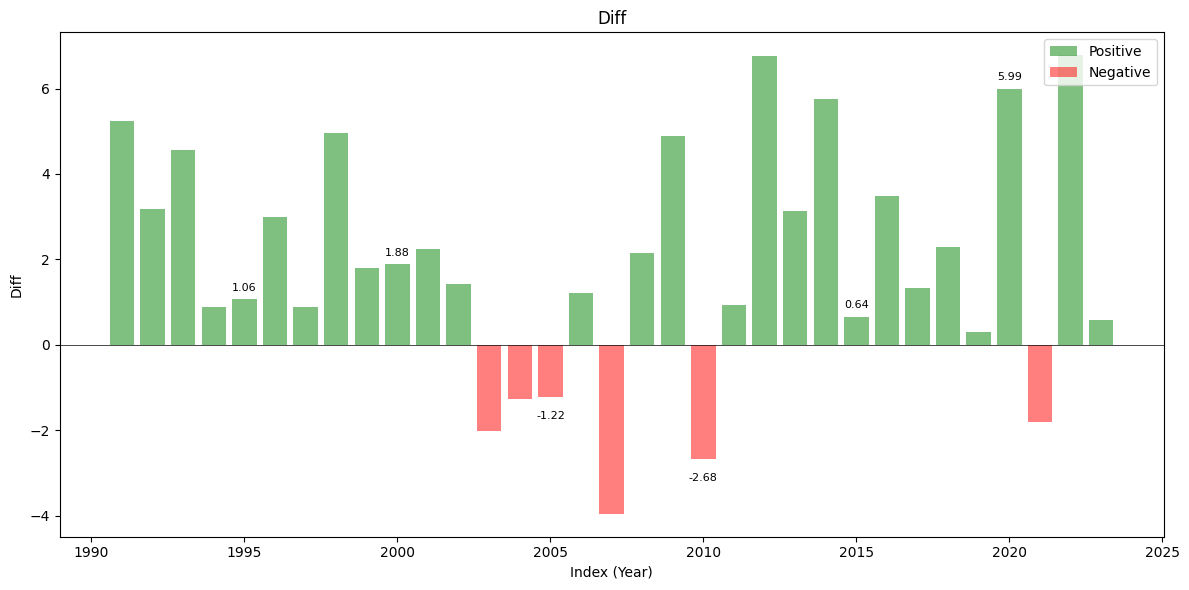

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Diff' as the column and the index is the year

# Filter data for years greater than 1990
df_filtered = df[df.index > 1990]

# Create a positive and negative series
positive_diff = df_filtered[df_filtered["Diff"] > 0]
negative_diff = df_filtered[df_filtered["Diff"] < 0]

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Plot the positive and negative series
plt.bar(positive_diff.index, positive_diff["Diff"], color="green", alpha=0.5, label="Positive")
plt.bar(negative_diff.index, negative_diff["Diff"], color="red", alpha=0.5, label="Negative")

# Function to format data labels
def format_label(value):
    return f"{value:.2f}"

# Display data labels for every nth data point
n = 5
for index, value in zip(positive_diff.index, positive_diff["Diff"]):
    if index % n == 0:
        plt.annotate(format_label(value), (index, value), textcoords="offset points", xytext=(0, 5),
                     ha='center', va='bottom', fontsize=8, color='black')

for index, value in zip(negative_diff.index, negative_diff["Diff"]):
    if index % n == 0:
        plt.annotate(format_label(value), (index, value), textcoords="offset points", xytext=(0, -10),
                     ha='center', va='top', fontsize=8, color='black')

# Add a horizontal line at y=0 to represent the x-axis
plt.axhline(0, color='black', linewidth=0.5)

# Add a title and labels
plt.title("Diff")
plt.xlabel("Index (Year)")
plt.ylabel("Diff")

# Add the legend
plt.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


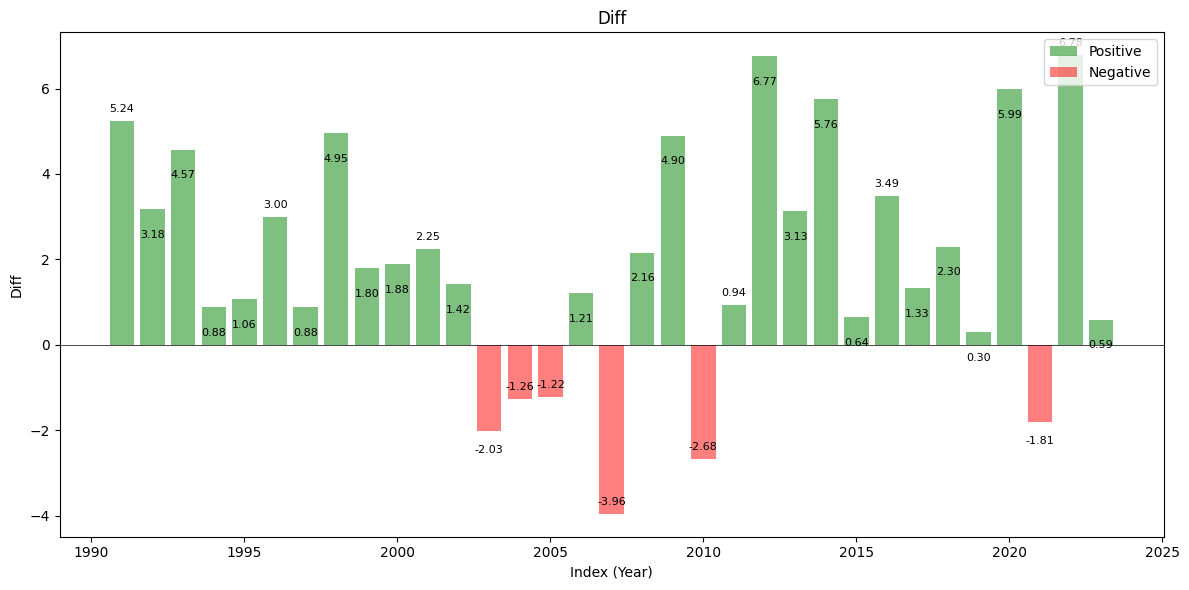

In [84]:
#enumerate each bar seperately to declutter

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Diff' as the column and the index is the year

# Filter data for years greater than 1990
df_filtered = df[df.index > 1990]

# Create a positive and negative series
positive_diff = df_filtered[df_filtered["Diff"] > 0]
negative_diff = df_filtered[df_filtered["Diff"] < 0]

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Plot the positive and negative series
plt.bar(positive_diff.index, positive_diff["Diff"], color="green", alpha=0.5, label="Positive")
plt.bar(negative_diff.index, negative_diff["Diff"], color="red", alpha=0.5, label="Negative")

# Function to format data labels
def format_label(value):
    return f"{value:.2f}"

# Display data labels for every nth data point for positive bars
n = 5
for i, (index, value) in enumerate(zip(positive_diff.index, positive_diff["Diff"])):
    if i % n == 0:
        plt.annotate(format_label(value), (index, value), textcoords="offset points", xytext=(0, 5),
                     ha='center', va='bottom', fontsize=8, color='black')
    else:
        plt.annotate(format_label(value), (index, value), textcoords="offset points", xytext=(0, -15),
                     ha='center', va='top', fontsize=8, color='black')

# Display data labels for every nth data point for negative bars
for i, (index, value) in enumerate(zip(negative_diff.index, negative_diff["Diff"])):
    if i % n == 0:
        plt.annotate(format_label(value), (index, value), textcoords="offset points", xytext=(0, -10),
                     ha='center', va='top', fontsize=8, color='black')
    else:
        plt.annotate(format_label(value), (index, value), textcoords="offset points", xytext=(0, 5),
                     ha='center', va='bottom', fontsize=8, color='black')

# Add a horizontal line at y=0 to represent the x-axis
plt.axhline(0, color='black', linewidth=0.5)

# Add a title and labels
plt.title("Diff")
plt.xlabel("Index (Year)")
plt.ylabel("Diff")

# Add the legend
plt.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


In [86]:
df['Moving_Average'] = df['Exchange Rate'].rolling(window=3).mean()
df

,Exchange Rate,Diff,delta_rank,Moving_Average
Year,,,,
1913,0.09,NaN,NaN,NaN
1925,0.10,0.01,48.0,NaN
1947,4.16,4.06,9.0,1.450000
1948,3.31,-0.85,72.0,2.523333
1949,3.67,0.36,40.0,3.713333
...,...,...,...,...
2019,70.39,0.30,43.0,69.423333
2020,76.38,5.99,3.0,72.286667
2021,74.57,-1.81,75.0,73.780000


Great for comparision purpose:

axhline: The axhline function in matplotlib draws a horizontal line across the entire width of the plot at the specified y-values.

For example, plt.axhline(y=mean_volatility, color='b', linestyle='-', label='Mean') will draw a blue horizontal line at the y-value equal to mean_volatility, across the entire width of the plot. The linestyle '-' specifies that the line should be solid.

In your case, axhline is used to draw horizontal lines representing the minimum, maximum, mean, and median volatility on the plot.

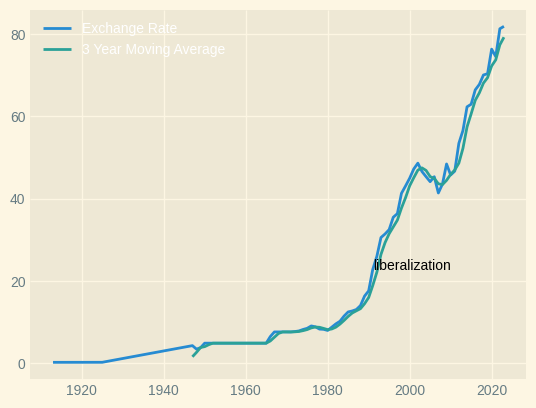

In [124]:
plt.style.use('Solarize_Light2')
plt.plot(df['Exchange Rate'],label='Exchange Rate')
plt.plot(df['Moving_Average'],label='3 Year Moving Average')
plt.text(x=1991,y=22.74,s='liberalization',color='black')
plt.legend()
plt.grid(True);

# # Annotate with arrow - didnt work as expected try again
#plt.annotate('Liberalization', xy=(1991, 22.74), xytext=(3, 4),
#              arrowprops=dict(facecolor='black', shrink=0.05))


# the code below to arrange the elements in the x axis
#years = np.arange(2000, 2024, 2) # Array of years from 2000 to 2023 with a step of 2 plt.xticks(years) # Sets the ticks on the x-axis

In [111]:
#print(plt.style.available) #this will generate the styles available I like the solar one

#change it to a micro metric with the same sub field and then conduct the analysis

df['volatility'] = df['Exchange Rate'].diff().rolling(window=3).std()

df

# basically faster way of writing the code below
# df['Change'] = df['Exchange Rate'].diff()  # The change in 'Exchange Rate' from the previous period
# df['Volatility'] = df['Change'].rolling(window=3).std()  # The standard deviation of the change over a rolling window of 3 periods



,Exchange Rate,Diff,delta_rank,Moving_Average,volatility
Year,,,,,
1913,0.09,NaN,NaN,NaN,NaN
1925,0.10,0.01,48.0,NaN,NaN
1947,4.16,4.06,9.0,1.450000,NaN
1948,3.31,-0.85,72.0,2.523333,2.622028
1949,3.67,0.36,40.0,3.713333,2.558066
...,...,...,...,...,...
2019,70.39,0.30,43.0,69.423333,1.000150
2020,76.38,5.99,3.0,72.286667,2.886526
2021,74.57,-1.81,75.0,73.780000,4.034604


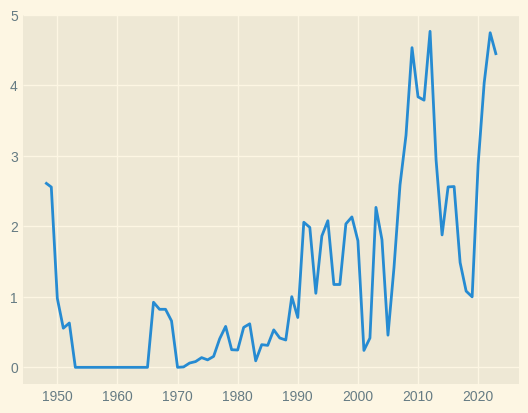

In [113]:
plt.plot(df['volatility']);

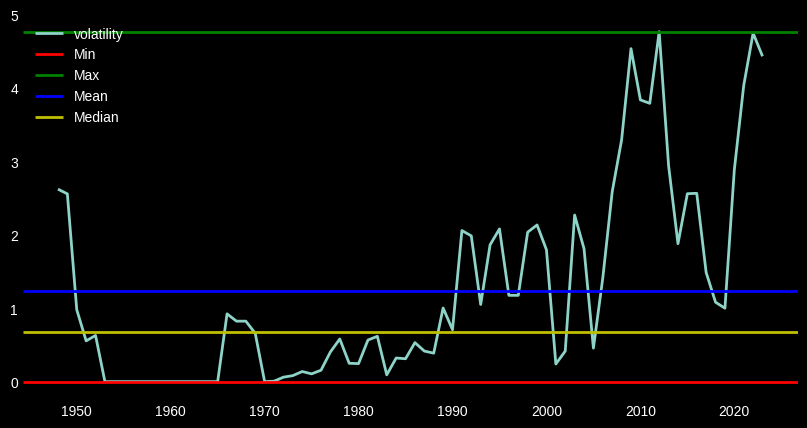

In [122]:
# I dont understand what the fuck it is but here it is

# wow amazing, really important information to map out volatility # alerts after these many sd

# This maps the volitility of the volitility

# Calculating the statistics
min_volatility = df['volatility'].min()
max_volatility = df['volatility'].max()
mean_volatility = df['volatility'].mean()
median_volatility = df['volatility'].median()

# Plotting the volatility and the statistics
plt.figure(figsize=(10, 5))
plt.grid(False)
plt.style.use("dark_background")
plt.plot(df['volatility'], label='volatility')
plt.axhline(y=min_volatility, color='r', linestyle='-', label='Min')
plt.axhline(y=max_volatility, color='g', linestyle='-', label='Max')
plt.axhline(y=mean_volatility, color='b', linestyle='-', label='Mean')
plt.axhline(y=median_volatility, color='y', linestyle='-', label='Median')
plt.legend()
plt.show()

